In [2]:
## Import necessary librarise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
#read cvs file
#df = pd.read_csv('C:\\Lincolnuni\\COMP_647\\project_1\\comp647\\dataset\\raw\\crop_yield_dataset.csv')
df_weather = pd.read_csv('../dataset/processed/crop_weather_data_0.csv')

# Display the first 5 rows
df_weather.head()

,Date,Crop_Type,Temperature,Humidity,Wind_Speed,Crop_Yield,Year,Month,Day,Temperature_int
0,2014-01-01,Wheat,9.440599,80.000000,10.956707,0.000000,2014,1,1,9
1,2014-01-01,Corn,20.052576,79.947424,8.591577,104.871310,2014,1,1,20
2,2014-01-01,Rice,12.143099,80.000000,7.227751,0.000000,2014,1,1,12
3,2014-01-01,Barley,19.751848,80.000000,2.682683,58.939796,2014,1,1,20
4,2014-01-01,Soybean,16.110395,80.000000,7.696070,32.970413,2014,1,1,16


In [4]:
print(df_weather.isnull().sum())

Date               0
Crop_Type          0
Temperature        0
Humidity           0
Wind_Speed         0
Crop_Yield         0
Year               0
Month              0
Day                0
Temperature_int    0
dtype: int64


In [5]:
#Print data info (data types, non-null counts, memory usage)
print(df_weather.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36520 entries, 0 to 36519
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             36520 non-null  object 
 1   Crop_Type        36520 non-null  object 
 2   Temperature      36520 non-null  float64
 3   Humidity         36520 non-null  float64
 4   Wind_Speed       36520 non-null  float64
 5   Crop_Yield       36520 non-null  float64
 6   Year             36520 non-null  int64  
 7   Month            36520 non-null  int64  
 8   Day              36520 non-null  int64  
 9   Temperature_int  36520 non-null  int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 2.8+ MB
None


In [6]:
# Round Temperature, Humidity, and Wind_Speed to nearest integer
df_weather['Temperature_int'] = df_weather['Temperature'].round().astype(int)
df_weather['Humidity_int'] = df_weather['Humidity'].round().astype(int)
df_weather['Wind_Speed_int'] = df_weather['Wind_Speed'].round().astype(int)

print(df_weather[['Temperature', 'Temperature_int',
                  'Humidity', 'Humidity_int',
                  'Wind_Speed', 'Wind_Speed_int']].head())

   Temperature  Temperature_int   Humidity  Humidity_int  Wind_Speed  \
0     9.440599                9  80.000000            80   10.956707   
1    20.052576               20  79.947424            80    8.591577   
2    12.143099               12  80.000000            80    7.227751   
3    19.751848               20  80.000000            80    2.682683   
4    16.110395               16  80.000000            80    7.696070   

   Wind_Speed_int  
0              11  
1               9  
2               7  
3               3  
4               8  


In [7]:
# Round Temperature, Humidity, and Wind_Speed to nearest integer
# Overwrite the existing columns instead of creating new ones
df_weather['Temperature'] = df_weather['Temperature'].round().astype(int)
df_weather['Humidity']    = df_weather['Humidity'].round().astype(int)
df_weather['Wind_Speed']  = df_weather['Wind_Speed'].round().astype(int)

# Print to verify the changes
print(df_weather[['Temperature', 'Humidity', 'Wind_Speed']].head())

   Temperature  Humidity  Wind_Speed
0            9        80          11
1           20        80           9
2           12        80           7
3           20        80           3
4           16        80           8


In [8]:
# Remove integer-converted columns (Temperature_int, Humidity_int, Wind_Speed_int)
df_weather = df_weather.drop(columns=['Temperature_int', 'Humidity_int', 'Wind_Speed_int'])

# Verify columns are removed
print(df_weather.head())

         Date Crop_Type  Temperature  Humidity  Wind_Speed  Crop_Yield  Year  \
0  2014-01-01     Wheat            9        80          11    0.000000  2014   
1  2014-01-01      Corn           20        80           9  104.871310  2014   
2  2014-01-01      Rice           12        80           7    0.000000  2014   
3  2014-01-01    Barley           20        80           3   58.939796  2014   
4  2014-01-01   Soybean           16        80           8   32.970413  2014   

   Month  Day  
0      1    1  
1      1    1  
2      1    1  
3      1    1  
4      1    1  


In [9]:
# Display the first 5 rows
df_weather.head()

,Date,Crop_Type,Temperature,Humidity,Wind_Speed,Crop_Yield,Year,Month,Day
0,2014-01-01,Wheat,9,80,11,0.000000,2014,1,1
1,2014-01-01,Corn,20,80,9,104.871310,2014,1,1
2,2014-01-01,Rice,12,80,7,0.000000,2014,1,1
3,2014-01-01,Barley,20,80,3,58.939796,2014,1,1
4,2014-01-01,Soybean,16,80,8,32.970413,2014,1,1


In [10]:
#Display summary statistics for numerical columns
print(df_weather.describe())

        Temperature      Humidity    Wind_Speed    Crop_Yield          Year  \
count  36520.000000  36520.000000  36520.000000  36520.000000  36520.000000   
mean      23.811528     74.259502     10.021440     26.878480   2018.499726   
std        8.926331      6.772669      3.010711     25.740936      2.871939   
min       -4.000000     46.000000     -3.000000      0.000000   2014.000000   
25%       17.000000     70.000000      8.000000      0.000000   2016.000000   
50%       23.000000     77.000000     10.000000     23.366344   2018.500000   
75%       30.000000     80.000000     12.000000     46.415729   2021.000000   
max       54.000000     80.000000     23.000000    136.711982   2023.000000   

              Month           Day  
count  36520.000000  36520.000000  
mean       6.523549     15.727820  
std        3.448580      8.799445  
min        1.000000      1.000000  
25%        4.000000      8.000000  
50%        7.000000     16.000000  
75%       10.000000     23.000000  


In [11]:
df_weather.columns

Index(['Date', 'Crop_Type', 'Temperature', 'Humidity', 'Wind_Speed',
       'Crop_Yield', 'Year', 'Month', 'Day'],
      dtype='object')

In [12]:
# Check for duplicates in each column and print the count of duplicates for each column.
for col in df_weather.columns:
    duplicated_count = df_weather[col].duplicated().sum()
    print(f"Column: {col}")
    print(f"Duplicate Count: {duplicated_count}")
    print("*" * 50)

Column: Date
Duplicate Count: 32868
**************************************************
Column: Crop_Type
Duplicate Count: 36510
**************************************************
Column: Temperature
Duplicate Count: 36462
**************************************************
Column: Humidity
Duplicate Count: 36485
**************************************************
Column: Wind_Speed
Duplicate Count: 36493
**************************************************
Column: Crop_Yield
Duplicate Count: 11024
**************************************************
Column: Year
Duplicate Count: 36510
**************************************************
Column: Month
Duplicate Count: 36508
**************************************************
Column: Day
Duplicate Count: 36489
**************************************************


In [13]:
# Columns where all values are the same (constant features).
constant_features = [col for col in df_weather.columns if df_weather[col].nunique() == 1]
print("Constant features:", constant_features)

Constant features: []


In [15]:
# Columns with mostly missing values (e.g., more than x% missing)
threshold = 5
print(f"Total records {df_weather.shape[0]}")
print("*"* 50)
for col in df_weather.columns:
    missing_count = df_weather[col].isnull().sum()
    missing_ratio = (missing_count / df_weather.shape[0]) * 100
    if missing_ratio > threshold:
        print(f"Column: {col} has {missing_count} missing values ({missing_ratio:.2f}%)")
        print("*" * 50)

Total records 36520
**************************************************


In [16]:
# Display the DataFrame having missing data.
df_missing_data = df_weather[df_weather.isnull().any(axis=1)]
df_missing_data.shape
df_missing_data.tail()

,Date,Crop_Type,Temperature,Humidity,Wind_Speed,Crop_Yield,Year,Month,Day


In [17]:
# Identify numerical and categorical columns.
numerical_columns = df_weather.select_dtypes(include=[np.number]).columns
categorical_columns = df_weather.select_dtypes(include=['object', 'category']).columns
print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: Index(['Temperature', 'Humidity', 'Wind_Speed', 'Crop_Yield', 'Year', 'Month',
       'Day'],
      dtype='object')
Categorical columns: Index(['Date', 'Crop_Type'], dtype='object')


In [18]:
# Group the data by Crop_Type and Year, then calculate the average Crop_Yield
grouped = df_weather.groupby(['Crop_Type', 'Year'])['Crop_Yield'].mean().reset_index()
print(grouped.head())

  Crop_Type  Year  Crop_Yield
0    Barley  2014   24.932251
1    Barley  2015   24.955955
2    Barley  2016   24.531108
3    Barley  2017   26.245359
4    Barley  2018   24.827279


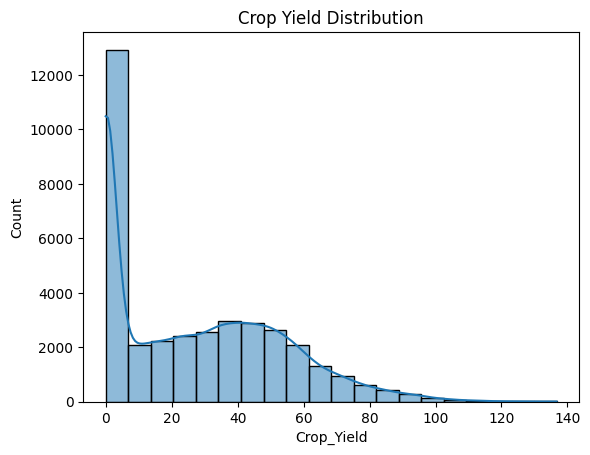

In [19]:
# Crop Yield distribution
sns.histplot(df_weather['Crop_Yield'], kde=True, bins=20)
plt.title("Crop Yield Distribution")
plt.show()

### Insights from the graph
1. The Crop_Yield data is highly skewed, with a very large proportion of values equal to zero.

Text(0, 0.5, 'Average Crop Yield')

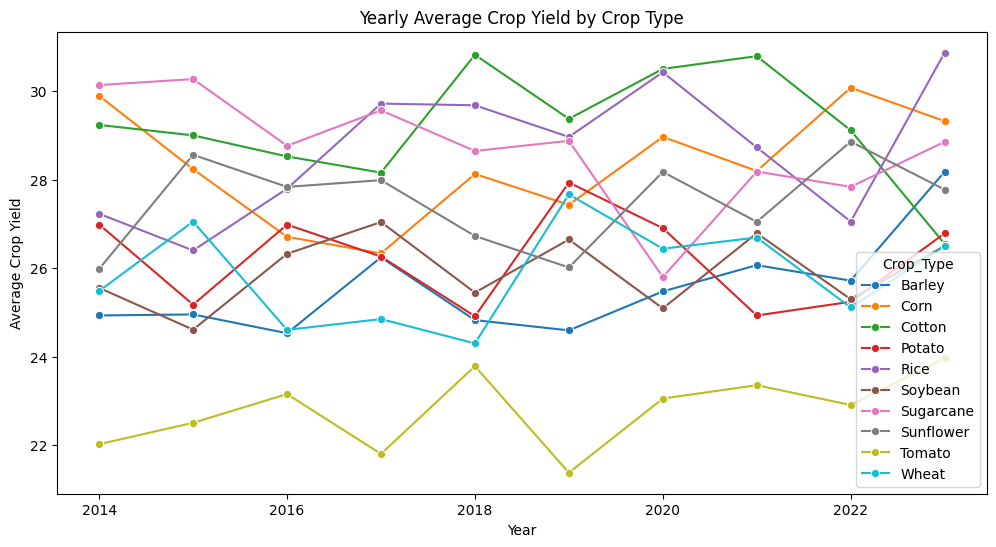

In [20]:
# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Plot a line chart showing average crop yield per year by crop type
sns.lineplot(data=grouped, x='Year', y='Crop_Yield', hue='Crop_Type', marker='o')
plt.title("Yearly Average Crop Yield by Crop Type")
plt.xlabel("Year")
plt.ylabel("Average Crop Yield")

### Insights from the graph
1. Among the different crop types, cotton shows one of the highest average yields.
2. Among the various crop types, tomato shows one of the lowest average yields.
3. The trend in crop yield varies by crop type, with certain crops experiencing growth and others showing a downward trend during the same period. 
**Further analysis is needed to understand which factors are contributing to the variation in crop yield.**

C:\Users\james\AppData\Local\Temp\ipykernel_6244\1152867826.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x='Temperature', y='Crop_Yield', palette='viridis')


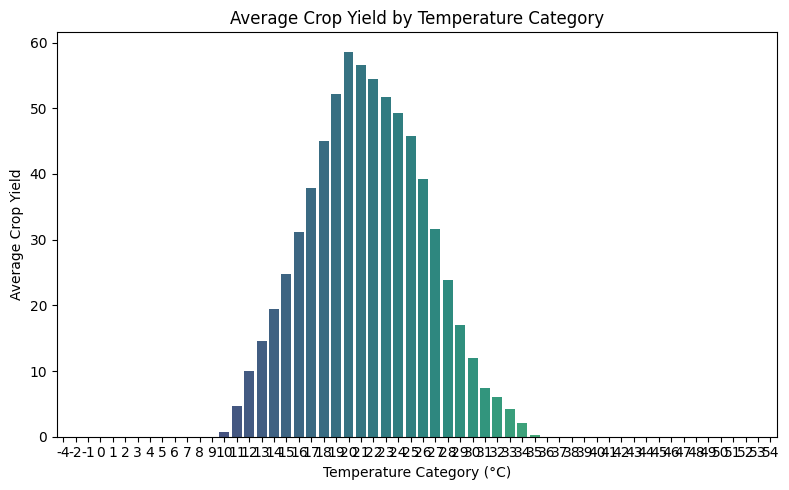

In [21]:
# Calculate mean Crop_Yield per temperature category
grouped = df_weather.groupby('Temperature')['Crop_Yield'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=grouped, x='Temperature', y='Crop_Yield', palette='viridis')

plt.title("Average Crop Yield by Temperature Category")
plt.xlabel("Temperature Category (°C)")
plt.ylabel("Average Crop Yield")
plt.tight_layout()
plt.show()

### Insights from the graph
1. Relationship between temperature and crop yield
- The graph shows a bell-shaped curve.
- At low temperatures (0–10℃), crop yield is almost zero or very low.
- Yield increases steadily with temperature and peaks around 20–22℃ (≈58–60).
- Beyond 25℃, yield declines sharply.
2. Optimal temperature range
- The highest yields are observed in the range of 18–24℃.
- This indicates that crop growth and productivity are maximized within this temperature band.
3. Impact of temperature stress
- Low temperatures (≤10℃) inhibit germination and early growth.
- High temperatures (≥28℃) cause water stress and physiological decline, leading to reduced yields.

In [22]:
# Define custom bins (in °C)
bins = [-10, 0, 10, 20, 30, 55]  # 예: 0~10, 10~20, 20~30, 30~40
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Create a new column 'Temp_Category' based on the bins
df_weather['Temp_Category'] = pd.cut(df_weather['Temperature'], bins=bins, labels=labels, include_lowest=True)

print(df_weather[['Temperature', 'Temp_Category']].head())

   Temperature Temp_Category
0            9           Low
1           20        Medium
2           12        Medium
3           20        Medium
4           16        Medium


C:\Users\james\AppData\Local\Temp\ipykernel_6244\3698691058.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_weather.groupby('Temp_Category')['Crop_Yield'].mean().reset_index()
C:\Users\james\AppData\Local\Temp\ipykernel_6244\3698691058.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x='Temp_Category', y='Crop_Yield', palette='viridis')


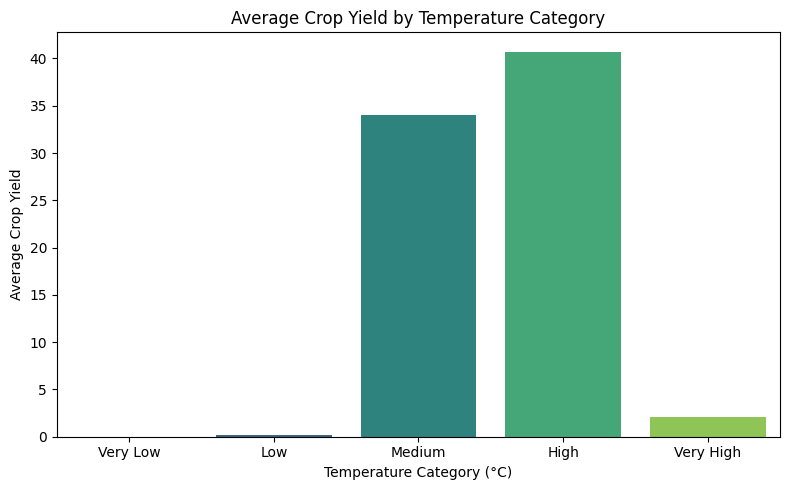

In [23]:
# Calculate mean Crop_Yield per temperature category
grouped = df_weather.groupby('Temp_Category')['Crop_Yield'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=grouped, x='Temp_Category', y='Crop_Yield', palette='viridis')

plt.title("Average Crop Yield by Temperature Category")
plt.xlabel("Temperature Category (°C)")
plt.ylabel("Average Crop Yield")
plt.tight_layout()
plt.show()

1. Very Low / Low categories
- Crop yield is nearly zero → extremely low temperatures make growth impossible or severely restricted.
2. Medium category
- Average yield rises significantly (≈34) → crops begin to grow effectively within this range.
3. High category
- The highest yield is recorded (≈41) → this represents the optimal temperature range for crop growth and maximum productivity.
4. Very High category
- Yield drops sharply (≈2) → excessive heat leads to physiological stress and reduced productivity.

In [24]:
# Temperature
# Group by Crop_Type and calculate mean Temperature and Crop_Yield
grouped = df_weather.groupby('Crop_Type')[['Temperature', 'Crop_Yield']].mean().reset_index()
print(grouped)

   Crop_Type  Temperature  Crop_Yield
0     Barley    23.815444   25.552846
1       Corn    23.754655   28.330560
2     Cotton    23.763691   29.208710
3     Potato    23.943319   26.213347
4       Rice    23.776013   28.688229
5    Soybean    23.765882   25.932047
6  Sugarcane    23.812705   28.694864
7  Sunflower    23.816539   27.498513
8     Tomato    23.901424   22.794184
9      Wheat    23.765608   25.871497


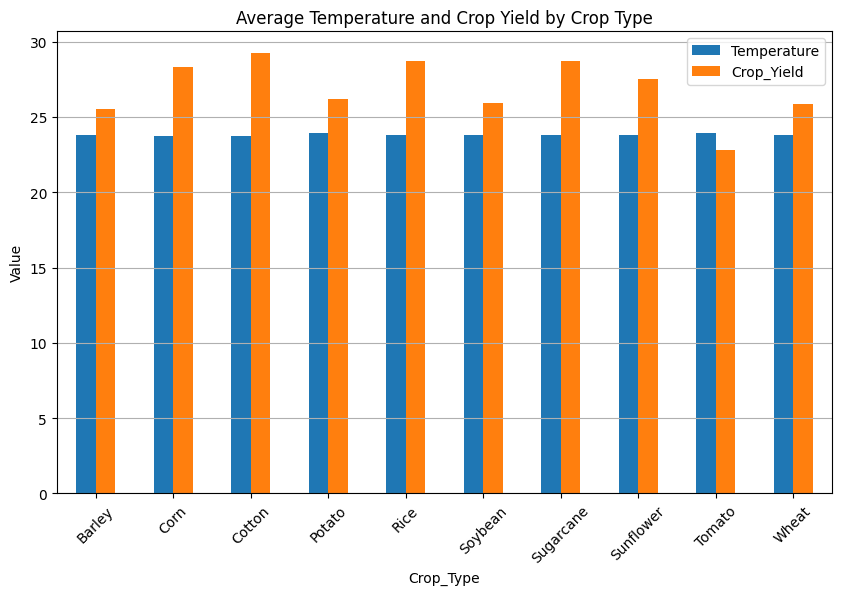

In [25]:
# Bar plot for average Temperature and Crop_Yield
grouped.plot(x='Crop_Type', y=['Temperature', 'Crop_Yield'], kind='bar', figsize=(10,6))
plt.title("Average Temperature and Crop Yield by Crop Type")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Insights from the graph

1. Overall trend
- The average temperature is fairly consistent across all crops, around 23–24℃.
- However, average crop yield varies by crop type, suggesting that temperature alone is not the sole determinant of productivity.
2. High-yield crops
- Cotton, Rice, Soybean, and Sugarcane show the highest average yields (28–29).

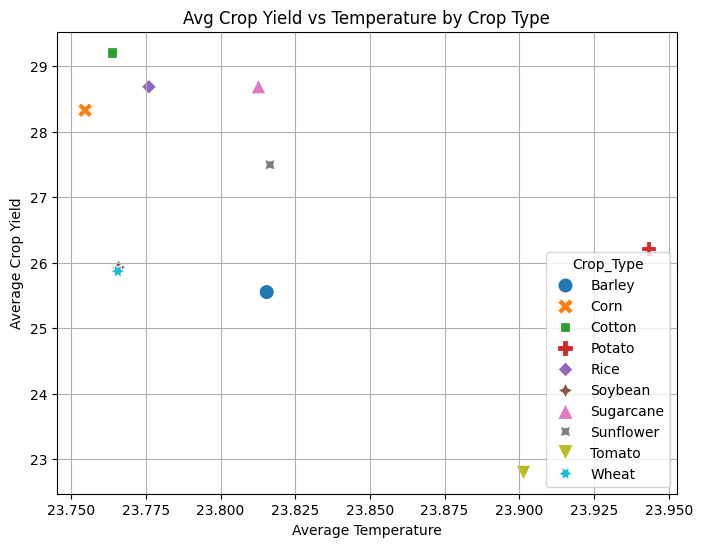

In [26]:
# Set figure size
plt.figure(figsize=(8,6))

# Scatter plot with different colors and markers by Crop_Type
sns.scatterplot(
    data=grouped,
    x='Temperature',
    y='Crop_Yield',
    hue='Crop_Type',      # Different colors by crop
    style='Crop_Type',    # Different marker shapes by crop
    s=120                 # Marker size
)

# Add chart title and labels
plt.title("Avg Crop Yield vs Temperature by Crop Type")
plt.xlabel("Average Temperature")
plt.ylabel("Average Crop Yield")

# Add grid
plt.grid(True)

# Show plot
plt.show()

### Insights from the graph
1. Temperature distribution
- All crops fall within a narrow range of 23.75℃ to 23.95℃, meaning temperature differences are minimal.
- Therefore, temperature alone cannot explain the variation in crop yields.

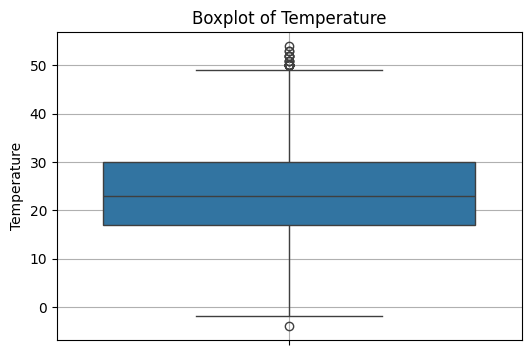

In [27]:
# Set plot size
plt.figure(figsize=(6, 4))

# Draw boxplot for 'Temperature'
sns.boxplot(y=df_weather['Temperature'])

# Set title
plt.title('Boxplot of Temperature')
plt.ylabel('Temperature')
plt.grid(True)

# Show the plot
plt.show()

### Insights from the graph
1. Median
- The median temperature is around 22–23℃, indicating this is the typical value for most observations.
2. Interquartile Range (IQR)
- Q1 (25%) ≈ 17℃, Q3 (75%) ≈ 30℃ → more than half of the data lies within the 17–30℃ range.
- This range generally represents suitable conditions for crop growth.
3. Outliers
- High-temperature outliers: Several values exceed 50℃, which are abnormally high.
- Low-temperature outlier: A value around -2℃ also appears.
- These may result from sensor errors, recording mistakes, or extreme weather events.

In [28]:
# Remove outliers from the 'Temperature' column using the IQR method
Q1 = df_weather['Temperature'].quantile(0.25)  # First quartile (25th percentile)
Q3 = df_weather['Temperature'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

print(Q1)
print(Q3)

17.0
30.0


In [29]:
# Filter out values outside the acceptable range (Q1 - 1.5*IQR to Q3 + 1.5*IQR)
df_weather = df_weather[(df_weather['Temperature'] >= Q1 - 1.5 * IQR) & (df_weather['Temperature'] <= Q3 + 1.5 * IQR)]
print(df_weather)
print("Outliers removed from 'Temperature' using IQR method")

             Date  Crop_Type  Temperature  Humidity  Wind_Speed  Crop_Yield  \
0      2014-01-01      Wheat            9        80          11    0.000000   
1      2014-01-01       Corn           20        80           9  104.871310   
2      2014-01-01       Rice           12        80           7    0.000000   
3      2014-01-01     Barley           20        80           3   58.939796   
4      2014-01-01    Soybean           16        80           8   32.970413   
...           ...        ...          ...       ...         ...         ...   
36515  2023-12-31     Cotton           20        80           4   73.323885   
36516  2023-12-31  Sugarcane           21        79           9   39.226521   
36517  2023-12-31     Tomato            6        80           9    0.000000   
36518  2023-12-31     Potato           11        80          11    6.067881   
36519  2023-12-31  Sunflower           11        80           5   11.825986   

       Year  Month  Day Temp_Category  
0      2014

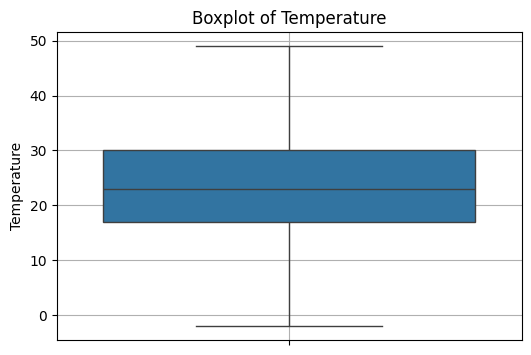

In [30]:
# Set plot size
plt.figure(figsize=(6, 4))

# Draw boxplot for 'Temperature'
sns.boxplot(y=df_weather['Temperature'])

# Set title
plt.title('Boxplot of Temperature')
plt.ylabel('Temperature')
plt.grid(True)

# Show the plot
plt.show()

### Insights from the graph
1. Median
- The median temperature is around 22–23℃, representing the central tendency of the dataset.
2. Whiskers
- Minimum ≈ -1℃, Maximum ≈ 49℃.
- Compared to the previous boxplot, the extreme outliers have been removed or adjusted, indicating that outlier treatment was applied.

In [31]:
# Temp_Category
# Group by Crop_Type and Temp_Category, then calculate mean Crop_Yield
grouped = df_weather.groupby(['Crop_Type', 'Temp_Category'])['Crop_Yield'].mean().reset_index()
print(grouped.head())

  Crop_Type Temp_Category  Crop_Yield
0    Barley      Very Low    0.000000
1    Barley           Low    0.256694
2    Barley        Medium   40.367406
3    Barley          High   33.363466
4    Barley     Very High    0.000000


C:\Users\james\AppData\Local\Temp\ipykernel_6244\4197248664.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_weather.groupby(['Crop_Type', 'Temp_Category'])['Crop_Yield'].mean().reset_index()


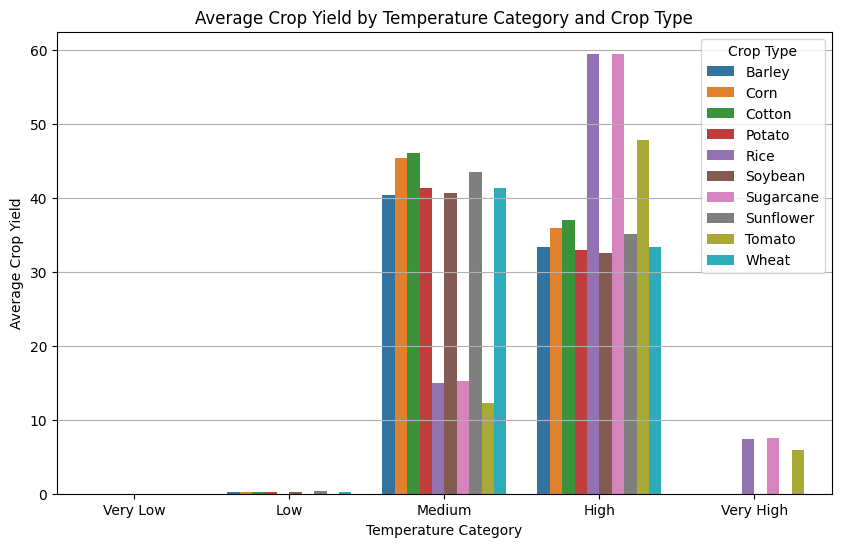

In [32]:
# Set the figure size for better readability
plt.figure(figsize=(10,6))

# Create a bar plot
# x-axis: Temperature Category (Low, Medium, High, etc.)
# y-axis: Average Crop Yield
# hue: Different colors for each Crop_Type
sns.barplot(
    data=grouped,
    x='Temp_Category',
    y='Crop_Yield',
    hue='Crop_Type'
)

# Add title to the chart
plt.title("Average Crop Yield by Temperature Category and Crop Type")
plt.xlabel("Temperature Category")
plt.ylabel("Average Crop Yield")
plt.legend(title='Crop Type')
plt.grid(axis='y')
plt.show()

### Insights from the graph
1. Very Low / Low categories
- All crops show yields close to zero.
- This confirms that extremely low temperatures make crop growth nearly impossible.
2. Medium category
- Most crops produce stable yields (around 40).
- Cotton, Corn, Sunflower, Potato, and Wheat record relatively higher yields (40–46).
- However, Rice, Sugarcane, and Tomato perform poorly in this range (≈15–25), indicating lower productivity under medium temperatures.
3. High category
- Overall yields increase further.
- Rice and Sugarcane reach the highest average yields (≈60), showing strong adaptation to warmer conditions.
- Tomato also performs much better in the High category (≈48) compared to Medium.
- Conversely, Barley and Wheat remain relatively low (≈33–34), even under higher temperatures.
4. Very High category
- Most crops lose productivity almost entirely.
- Only Rice, Sugarcane, and Tomato maintain some yield, suggesting they are more heat-tolerant crops.

Numeric variable analysis

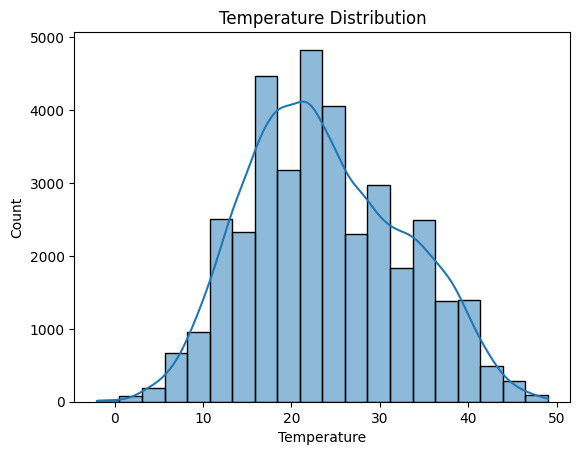

In [33]:
# Histogram: Show the distribution of Temperature values
# bins=20 → split into 20 intervals / kde=True → add KDE curve
sns.histplot(df_weather['Temperature'], bins=20, kde=True)
plt.title("Temperature Distribution")
plt.show()

### Insights from the graph
1. Distribution shape
- The data follows a roughly bell-shaped distribution, close to normal.
- A slight right-skew is observed, with a longer tail toward higher temperatures.
2. Main range
- The highest frequency occurs between 15℃ and 25℃, with about 4,000–5,000 observations in this interval.
- Values below 0℃ and above 40℃ are rare, representing extreme climate conditions.

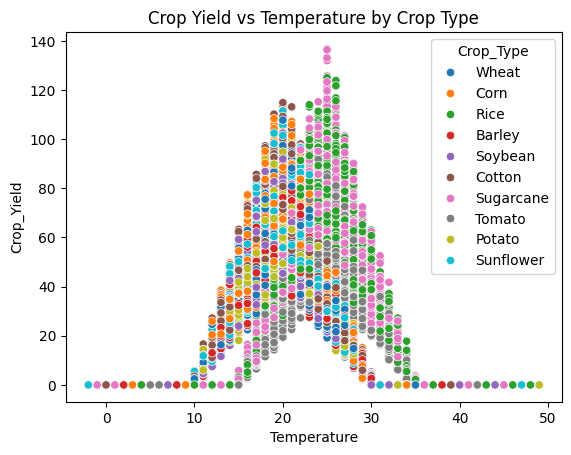

In [34]:
# Bivariate Analysis (Relationship between two variables)
# Scatter plot: Temperature vs Crop Yield by Crop Type
sns.scatterplot(data=df_weather, x='Temperature', y='Crop_Yield', hue='Crop_Type')
plt.title("Crop Yield vs Temperature by Crop Type")
plt.show()

### Insights from the graph
1. Crop-specific trends
- Wheat, Corn, Rice, Soybean, and Cotton achieve high yields in the 20–25℃ range.
- Tomato, Potato, and Sunflower also concentrate their productivity within this interval.
- Sugarcane and Rice maintain relatively high yields even in warmer conditions (25–30℃), showing greater heat tolerance.

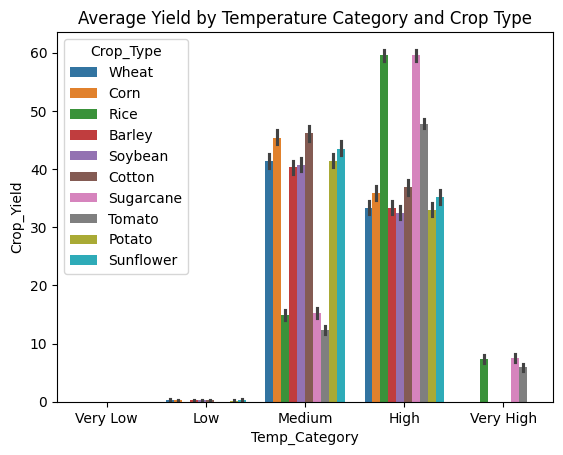

In [35]:
# Bar plot: Average Yield by Temperature Category and Crop Type
sns.barplot(data=df_weather, x='Temp_Category', y='Crop_Yield', hue='Crop_Type')
plt.title("Average Yield by Temperature Category and Crop Type")
plt.show()

### Insights from the graph
1. Very Low / Low categories
- All crops show yields close to zero.
- Extremely low temperatures make growth nearly impossible.
2. Medium category
- Most crops achieve stable yields around 40–45.
- Corn, Wheat, Sunflower, and Cotton perform relatively well in this range.
- In contrast, Rice, Sugarcane, and Tomato record lower yields, suggesting they are better suited for warmer 3. 3. conditions.
3. High category
- Overall yields increase further.
- Rice and Sugarcane stand out, reaching yields of about 60, indicating strong heat tolerance.
- Tomato also shows significant improvement (≈48) in this range.
- Barley and Wheat, however, remain at relatively lower yield levels.
4. Very High category
- Most crops experience a sharp decline in yield.
- Rice and Sugarcane still maintain some productivity, showing partial adaptation to extreme heat.

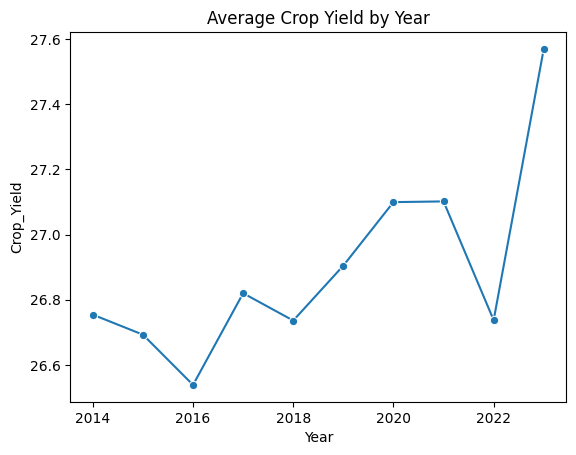

In [39]:
# Time-series Analysis
# Average yearly yield
yearly_yield = df_weather.groupby('Year')['Crop_Yield'].mean().reset_index()
sns.lineplot(data=yearly_yield, x='Year', y='Crop_Yield', marker='o')
plt.title("Average Crop Yield by Year")
plt.show()




### Insights from the graph
1. Overall Trend
- From 2014 to 2023, crop yield shows a gradual upward trend.
- However, the increase is not steep, reflecting relatively moderate changes.
2. Decline Period
- After 2014, there was a slight downward movement, with 2016 recording the lowest average yield (≈26.55).

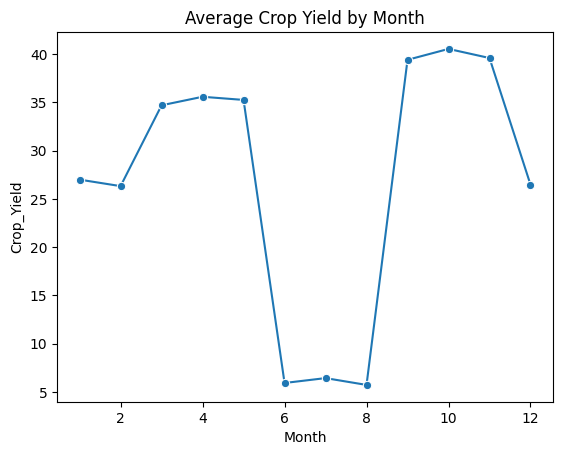

In [38]:
# Average monthly yield
monthly_yield = df_weather.groupby('Month')['Crop_Yield'].mean().reset_index()
sns.lineplot(data=monthly_yield, x='Month', y='Crop_Yield', marker='o')
plt.title("Average Crop Yield by Month")
plt.show()

### Insights from the graph
1. Early months (January–February)
- Yield remains moderate at around 26–27.
- Stable but not at peak levels.
2. Spring (March–May)
- Clear upward trend, with yields rising to above 35 in April and May.
- Reflects strong crop growth during this season.
3. Summer (June–August)
- Sharp decline, with yields dropping to the lowest point (≈6).
- Likely due to heat stress, water shortage, or other summer-related climate constraints.
4. Autumn (September–November)
- Yields rise again, reaching the highest point in October (≈40+).
- This is the most productive and stable period of the year.
5. December
- Yield falls back to around 27, returning to a moderate level similar to early months.

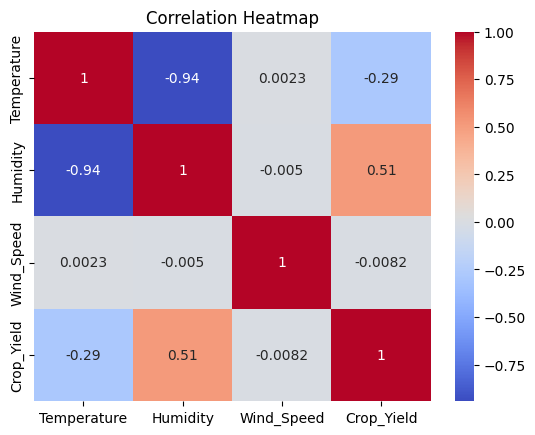

In [ ]:
# Correlation Analysis
# Correlation heatmap for numerical features
corr = df_weather[['Temperature','Humidity','Wind_Speed','Crop_Yield']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Insights from the graph
1. Humidity shows the strongest positive relationship with crop yield, highlighting the importance of water management for agricultural productivity.
2. Temperature has a slight negative impact on yield, suggesting that extreme heat could reduce crop performance.
3. Wind speed does not appear to play a meaningful role in yield outcomes in this dataset.

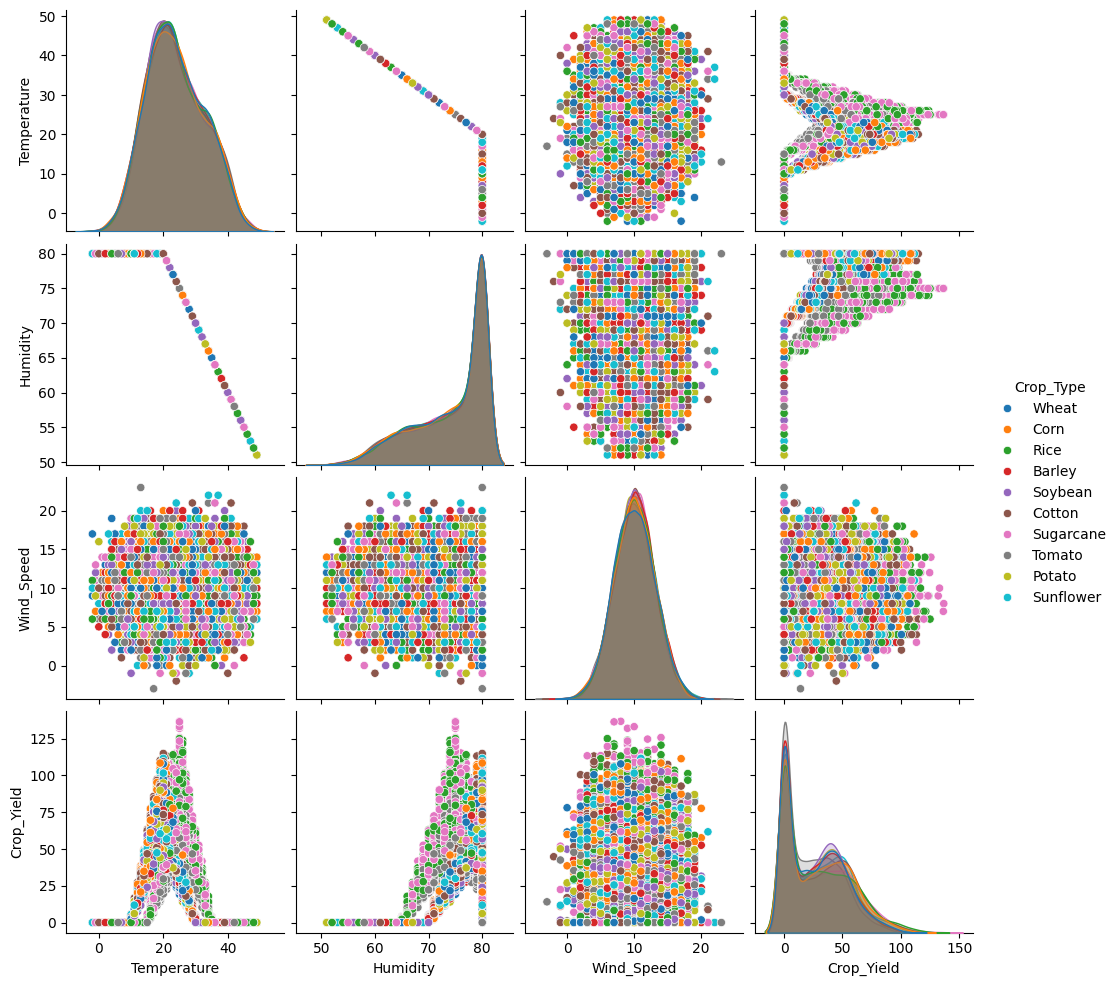

In [40]:
# Multivariate Analysis (Extra)
# Pair plot to visualize multiple relationships at once
sns.pairplot(df_weather[['Temperature','Humidity','Wind_Speed','Crop_Yield','Crop_Type']], hue='Crop_Type')
plt.show()

### Insights from the graph
1. Temperature distribution
- Follows a bell-shaped curve, concentrated around 20℃.
- No significant differences across crop types.
2. Humidity distribution
- Mostly concentrated between 50–80.
- Shows a strong negative relationship with Temperature → higher temperatures correspond to lower humidity.
3. Wind_Speed distribution
- Spread fairly evenly between 0–20.
- Shows no strong correlation with other variables.
4. Crop_Yield distribution
- Most values fall within 0–50, with a smaller number extending beyond 100.
- Shows curved relationships with Temperature and Humidity → yields peak under specific optimal conditions.
5. Variable correlations
- Temperature, Humidity: clear negative linear relationship.
- Humidity, Crop_Yield: positive correlation (higher humidity tends to increase yield).
- Temperature, Crop_Yield: negative correlation (higher temperatures reduce yield).
- Wind_Speed: largely independent, with minimal impact on yield.
6. Crop-type differences
- General patterns are consistent across all crop types.
- Crops like Sugarcane and Rice maintain relatively high yields under high-humidity conditions.
- Wheat and Barley show sharper yield declines under high temperatures.

🖼️ 그림 해석
1. 대각선 부분 (Diagonal Plots)
각 변수의 분포 (Histogram + KDE) 가 표시됨.
Temperature: 약 10~25도 구간이 가장 많음 → 정상적인 온도 분포
Humidity: 60~80% 부근에 밀집 → 특정 값에 집중된 경향
Wind_Speed: 정규분포에 가까움 (평균 근처에 몰려 있음)
Crop_Yield: 0 근처와 30~60, 일부 100 이상 값 → 이상치 의심 가능

2. 비대각선 부분 (Scatter Plots)
변수 간 상관관계를 색깔별로 표시 (Crop_Type별 색상)
Temperature vs Crop_Yield
→ 특정 온도 구간(10~25도)에서 수확량이 몰려 있음
→ 극단적으로 높은 수확량(>120)은 이상치일 가능성
Humidity vs Crop_Yield
→ 습도가 높을수록 일부 작물에서 수확량이 급증 (특이 패턴 존재)
→ 그러나 0 근처 값들이 많아 noise(노이즈)도 많음
Wind_Speed vs Crop_Yield
→ 뚜렷한 관계 없음 (고르게 분포)
→ 즉, 바람이 Crop Yield와 큰 직접적 영향은 없는 듯
Temperature vs Humidity
→ 선형 패턴(대각선 라인) → 데이터 수집 특성상 특정 조합으로 기록된 듯
→ 자연스러운 관계라기보다 데이터 생성 로직에서 생긴 구조적 패턴으로 보임
3. 전반적인 인사이트

데이터는 전반적으로 다양한 작물(Crop_Type) 별로 골고루 분포
하지만 Crop_Yield에서 이상치(outlier) 가 눈에 띔
0 값이 많음 (실제 실패 or 결측 대체?)
100 이상 값이 적지만 존재 (극단적 수치 → 제거 or 별도 처리 필요)

✅ 정리:

이 Pairplot은 데이터셋에서 변수 간 관계와 이상치 후보를 탐색하는 데 유용합니다.
특히 Crop_Yield의 분포가 비정상적으로 꼬리가 길고, 0 값이 많이 존재하는 점은 향후 이상치 처리(outlier handling) 과정에서 중요한 고려 사항입니다.

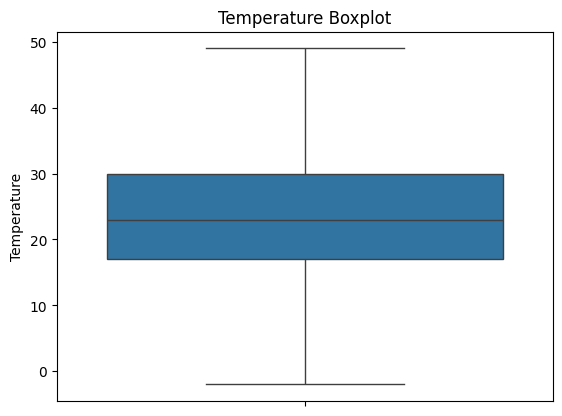

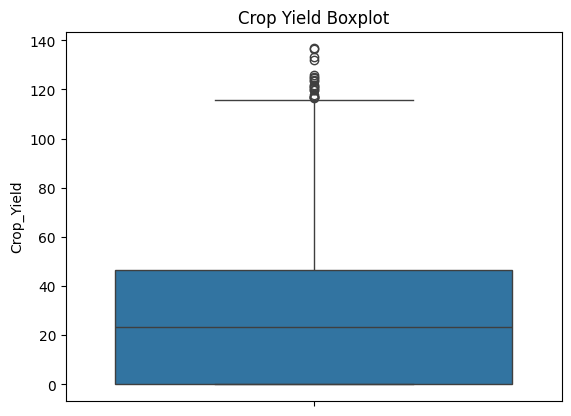

In [43]:
# Outlier Detection using Boxplot 
# Plot a boxplot for Temperature 
sns.boxplot(data=df_weather, y='Temperature')
plt.title("Temperature Boxplot")   
plt.show()  


# Plot a boxplot for Crop_Yield 
sns.boxplot(data=df_weather, y='Crop_Yield')
plt.title("Crop Yield Boxplot")    
plt.show()            

In [44]:
# Outlier Detection using IQR 

def detect_outliers_iqr(data, column):

    Q1 = data[column].quantile(0.25)   # 1st Quartile (Q1, 25%)
    Q3 = data[column].quantile(0.75)   # 3rd Quartile (Q3, 75%)
    IQR = Q3 - Q1                      # Interquartile Range (IQR)

    lower_bound = Q1 - 1.5 * IQR       # Lower threshold 
    upper_bound = Q3 + 1.5 * IQR       # Upper threshold 

    # Find outliers / 이상치 추출
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    print(f"Column: {column}")
    print(f" - Q1 (25%): {Q1}")
    print(f" - Q3 (75%): {Q3}")
    print(f" - IQR: {IQR}")
    print(f" - Lower Bound: {lower_bound}")
    print(f" - Upper Bound: {upper_bound}")
    print(f" - Outlier count: {len(outliers)} 개\n")

    return outliers


# Apply the function to Temperature and Crop_Yield
outliers_temp = detect_outliers_iqr(df_weather, 'Temperature')
outliers_yield = detect_outliers_iqr(df_weather, 'Crop_Yield')

Column: Temperature
 - Q1 (25%): 17.0
 - Q3 (75%): 30.0
 - IQR: 13.0
 - Lower Bound: -2.5
 - Upper Bound: 49.5
 - Outlier count: 0 개

Column: Crop_Yield
 - Q1 (25%): 0.0
 - Q3 (75%): 46.426922669420776
 - IQR: 46.426922669420776
 - Lower Bound: -69.64038400413116
 - Upper Bound: 116.06730667355194
 - Outlier count: 20 개



In [45]:
# Remove Outliers
# Keep only rows within the IQR range
df_weather_cleaned = df_weather[
    (df_weather['Crop_Yield'] >= 2.1744476181644252) & 
    (df_weather['Crop_Yield'] <= 72.97840770017459)
]

print("After removing outliers:")
print(" - Original count:", len(df_weather))
print(" - Cleaned count:", len(df_weather_cleaned))
print(" - Removed:", len(df_weather) - len(df_weather_cleaned))

After removing outliers:
 - Original count: 36497
 - Cleaned count: 23127
 - Removed: 13370


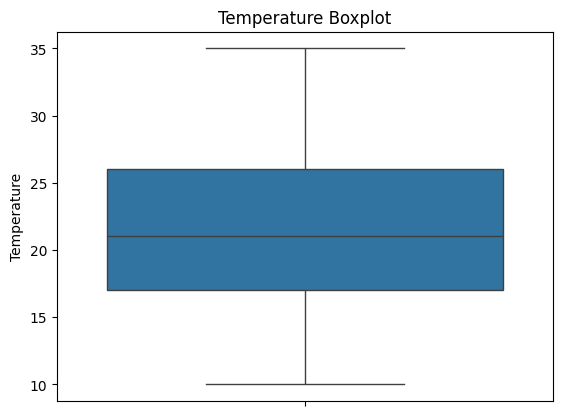

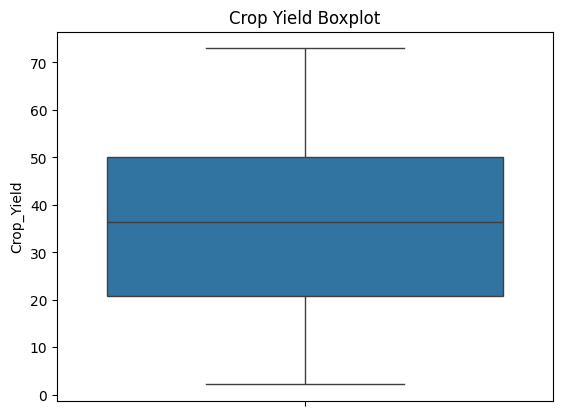

In [47]:
# Outlier Detection using Boxplot 
# Plot a boxplot for Temperature 
sns.boxplot(data=df_weather_cleaned, y='Temperature')
plt.title("Temperature Boxplot")   
plt.show()                         

# Plot a boxplot for Crop_Yield 
sns.boxplot(data=df_weather_cleaned, y='Crop_Yield')
plt.title("Crop Yield Boxplot")    
plt.show()     

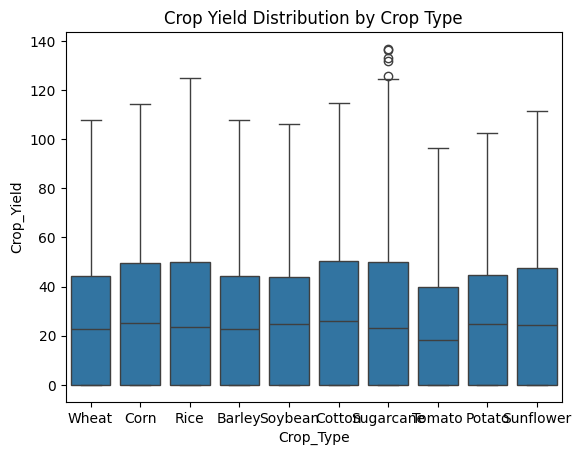

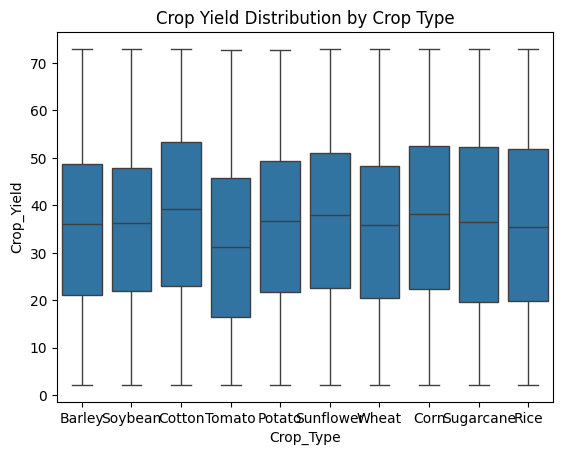

In [48]:
# Box plot: Crop Yield distribution per Crop Type
sns.boxplot(data=df_weather, x='Crop_Type', y='Crop_Yield')
plt.title("Crop Yield Distribution by Crop Type")
plt.show()

# Box plot: Crop Yield distribution per Crop Type
sns.boxplot(data=df_weather_cleaned, x='Crop_Type', y='Crop_Yield')
plt.title("Crop Yield Distribution by Crop Type")
plt.show()

In [50]:
df_weather_cleaned

,Date,Crop_Type,Temperature,Humidity,Wind_Speed,Crop_Yield,Year,Month,Day,Temp_Category,Crop_Type_Encoded
3,2014-01-01,Barley,20,80,3,58.939796,2014,1,1,Medium,0
4,2014-01-01,Soybean,16,80,8,32.970413,2014,1,1,Medium,5
5,2014-01-01,Cotton,15,80,10,29.356115,2014,1,1,Medium,2
7,2014-01-01,Tomato,18,80,8,22.221375,2014,1,1,Medium,8
8,2014-01-01,Potato,19,80,7,54.259727,2014,1,1,Medium,3
...,...,...,...,...,...,...,...,...,...,...,...
36511,2023-12-31,Corn,13,80,16,20.735135,2023,12,31,Medium,1
36513,2023-12-31,Barley,12,80,15,13.069169,2023,12,31,Medium,0
36516,2023-12-31,Sugarcane,21,79,9,39.226521,2023,12,31,High,6
36518,2023-12-31,Potato,11,80,11,6.067881,2023,12,31,Medium,3


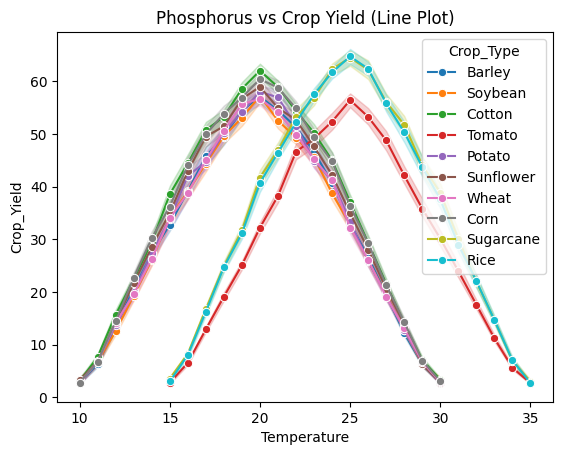

In [51]:
# Group by N (optional: bin P into ranges) and plot mean Crop_Yield per Crop_Type
sns.lineplot(data=df_weather_cleaned, x='Temperature', y='Crop_Yield', hue='Crop_Type', marker='o')
plt.title("Phosphorus vs Crop Yield (Line Plot)")
plt.show()

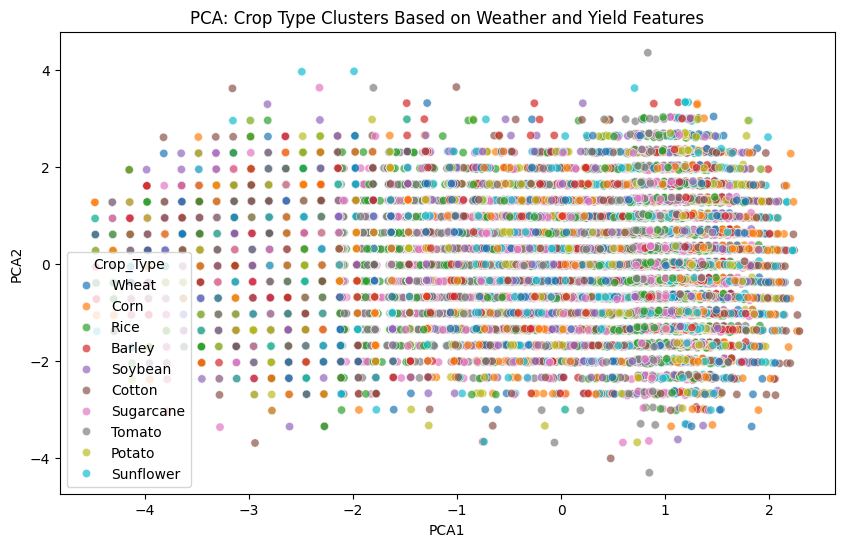

Explained variance ratio: [0.55212385 0.25001735]


In [52]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select only numeric features
X = df_weather[['Temperature','Humidity','Wind_Speed','Crop_Yield']]

# Standardize features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (reduce to 2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA results back to dataframe
df_weather['PCA1'] = X_pca[:,0]
df_weather['PCA2'] = X_pca[:,1]

# Plot PCA results colored by Crop_Type
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_weather, x='PCA1', y='PCA2', hue='Crop_Type', alpha=0.7)
plt.title("PCA: Crop Type Clusters Based on Weather and Yield Features")
plt.show()

# Explained variance ratio (to see how much information is preserved)
print("Explained variance ratio:", pca.explained_variance_ratio_)

### Insights from the graph
1. Overall trend
- For all crops, the median yield falls within the range of 20–30.
- The interquartile range (IQR) is also fairly similar, suggesting that overall yield distributions do not differ drastically between crops.
2.Lower-yielding crops
- Tomato and Potato have lower medians (≈15–20).
- Their average yields are lower, with relatively limited variability.
3. outliers
- The most significant outliers appear in Sugarcane (≈120–140).
- Other crops show fewer or less extreme outliers.